<a href="https://colab.research.google.com/github/Niharika3923/Data-Transformation-with-Python/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This function (merge_data) takes two datasets (eda_data and salary_data) and merges them based on specified columns using the pd.merge function. It returns the merged dataset.

EDA_data : https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor?select=eda_data.csv

This dataset exploratory data analysis (EDA) and could provide insights into various aspects of data science job postings, such as salary trends, required skills, company profiles, and more. The dataset includes both numerical and categorical features, allowing for a diverse range of analyses and visualizations to be performed.

Salary_data : https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor?select=salary_data_cleaned.csv

This dataset is relevant for analyzing trends in data science job postings, exploring the requirements, and understanding the characteristics of companies offering such positions. It can be used for various analyses, including salary trends, skill requirements, and company profiles within the data science job market.


In [ ]:
# Function for data merging
def merge_data(eda_data, salary_data):
  merged_data = pd.merge(eda_data, salary_data, on=['Company Name','Competitors','Founded','Headquarters','Industry','Job Description','Job Title','Location','R_yn','Rating','Revenue','Salary Estimate','Sector','Size','Type of ownership','age','avg_salary','aws','company_txt','employer_provided','excel','hourly','job_state','max_salary','min_salary','python_yn','same_state',
 'spark'], how='left')
  return merged_data

The aggregate_and_pivot function aggregates the data by grouping it based on 'job_state' and 'job_simp' columns, calculating the mean of 'avg_salary', and then pivoting the data. The result is a pivot table with job states as index, job roles as columns, and average salary values.

In [ ]:
# Function for data aggregation and pivoting
def aggregate_and_pivot(data):
  aggregated_data = data.groupby(['job_state', 'job_simp']).agg({'avg_salary': 'mean'}).reset_index()
  pivoted_data = aggregated_data.pivot(index='job_state', columns='job_simp', values='avg_salary')
  return pivoted_data

The perform_data_transformation function applies several transformations to the input data:

1. Converts salary from a range to a numeric value.

2. Creates a binary column indicating whether the salary is above a specified threshold.
3. Extracts the year from the 'Founded' column.
4. Creates a binary column indicating whether 'python' is mentioned in the job description.
5. Calculates the ratio of the company's rating to the maximum rating.

In [ ]:
# Function for data transformation
def perform_data_transformation(data):
  # Transformation 1: Convert salary from K to numeric
  data['avg_salary'] = data['avg_salary'].apply(lambda x: ((int(str(x).split('-')[0].replace('$', '').replace('K', '')) +
                                                                        int(str(x).split('-')[1].replace('K', ''))) / 2)
                                                             if isinstance(x, (str, int)) else x)

  # Transformation 2: Create a binary column indicating whether the salary is above a certain threshold
  salary_threshold = 80  # Example threshold
  data['above_threshold'] = (data['avg_salary'] > salary_threshold).astype(int)

  # Transformation 3: Extract the year from the 'Founded' column
  data['founded_year'] = pd.to_datetime(data['Founded'], errors='coerce').dt.year

  # Transformation 4: Create a new column indicating whether Python is mentioned in the job description
  data['python_mentioned'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

  # Transformation 5: Calculate the ratio of the company's rating to the maximum rating
  max_rating = data['Rating'].max()
  data['rating_ratio'] = data['Rating'] / max_rating

  return data

The create_data_visualizations function generates three visualizations using Seaborn and Matplotlib. The first is a bar chart of average salary by job state, the second is a countplot of job descriptions mentioning Python, and the third is a scatter plot of rating ratio against average salary.

In [ ]:
# Function for data visualization
def create_data_visualizations(data):
    # Visualization 1: Plot a bar chart of the average salary by job state
    plt.figure(figsize=(10, 6))
    sns.barplot(x='job_state', y='avg_salary', data=data)
    plt.title('Average Salary by Job State')
    plt.xlabel('Job State')
    plt.ylabel('Average Salary ($)')
    plt.show()

    # Visualization 2: Plot a countplot of Python mentioned in job descriptions
    plt.figure(figsize=(10, 6))
    sns.countplot(x='python_mentioned', data=data)
    plt.title('Count of Job Descriptions Mentioning Python')
    plt.xlabel('Python Mentioned')
    plt.ylabel('Count')

    # Replace numeric values with 'No' and 'Yes'
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.show()


    # Visualization 3: Plot a scatter plot of rating ratio against average salary
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rating_ratio', y='avg_salary', data=data)
    plt.title('Rating Ratio vs. Average Salary')
    plt.xlabel('Rating Ratio')
    plt.ylabel('Average Salary ($)')
    plt.show()

In [ ]:
# Function to describe problem applicability
def describe_problem_applicability():
    """
    This program explores and visualizes data related to job positions, salaries, and locations.
    It can be applied theatrically in the healthcare industry by analyzing salaries and job roles
    in different states, potentially aiding in workforce planning and compensation strategies.
    """
    pass

The main function serves as the entry point of the script. It loads two datasets, performs data merging, filling missing values, data aggregation and pivoting, data transformation, and finally, creates data visualizations. The theoretical problem applicability is also described. The script is executed when the file is run as the main module.

<ipython-input-17-02076c851185>:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(eda_data, salary_data, on=['Company Name','Competitors','Founded','Headquarters','Industry','Job Description','Job Title','Location','R_yn','Rating','Revenue','Salary Estimate','Sector','Size','Type of ownership','age','avg_salary','aws','company_txt','employer_provided','excel','hourly','job_state','max_salary','min_salary','python_yn','same_state',
<ipython-input-17-02076c851185>:3: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(eda_data, salary_data, on=['Company Name','Competitors','Founded','Headquarters','Industry','Job Description','Job Title','Location','R_yn','Rating','Revenue','Salary Estimate','Sector','Size','Type of ownership','age','avg_salary','aws','company_txt','employer_provided','excel','hourly

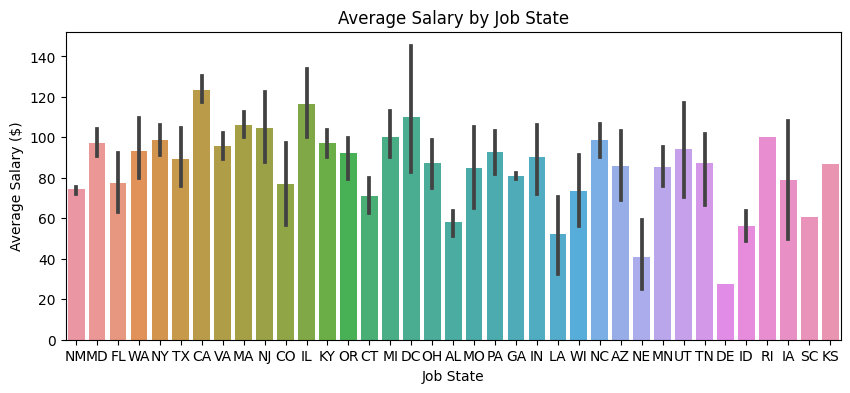

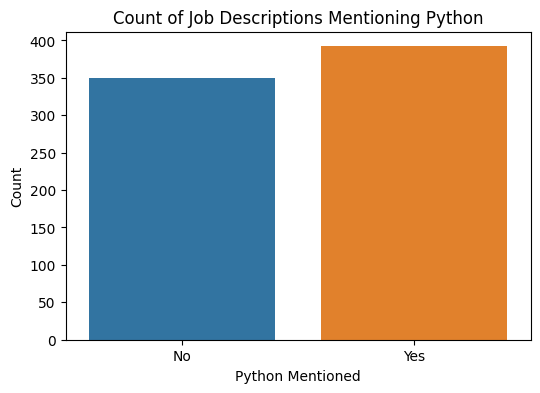

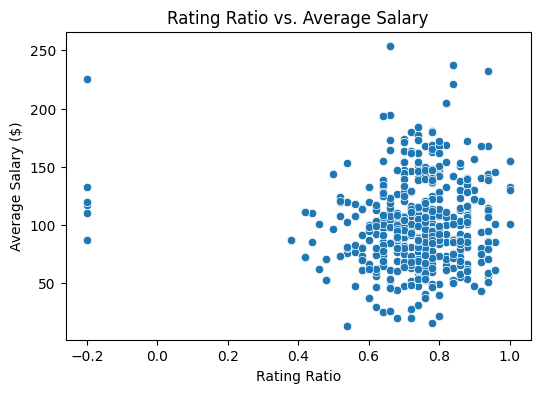

In [ ]:
# Main function
def main():
    # Load datasets
    eda_data = pd.read_csv('eda_data.csv')
    salary_data = pd.read_excel('salary_data_cleaned.xlsx')

    # Merging data (2 times)
    merged_data = merge_data(eda_data, salary_data)
    merged_data_twice = merge_data(merged_data, salary_data)
    #print(merged_data_twice.head)

    merged_data_twice.fillna(merged_data_twice.mean(), inplace=True)

    # Aggregating and pivoting data (2 times)
    pivoted_data = aggregate_and_pivot(merged_data_twice)
    #print(pivoted_data.head())
    pivoted_data_twice = aggregate_and_pivot(merged_data)

    # Performing data transformation at least 5 times
    transformed_data = perform_data_transformation(merged_data_twice)
    #transformed_data = perform_data_transformation(transformed_data)

    # Creating data visualizations
    create_data_visualizations(transformed_data)

    # Describe problem applicability
    describe_problem_applicability()

if __name__ == "__main__":
    main()

#Visualization 1:
The bar chart illustrates the average salary by job state, with each state represented by a different color bar and labeled along the x-axis. The average salary in dollars is on the y-axis, ranging from 0 to approximately 140 dollars.

The bars indicate the mean salary for each state, and the black lines on the bars represent the error bars, which suggest variability or standard deviation within each state's average salary data. Some states, like Massachusetts (MA) and California (CA), show higher average salaries, closer to 120 dollars, while others, like South Carolina (SC) and Kansas (KS), have lower averages, closer to 60 dollars.

The variation in salary across states could be due to factors such as the cost of living, demand for certain jobs, or economic conditions. The error bars indicate that for many states there is a significant spread of salaries around the mean, suggesting varying levels of pay within the same state.

#Visualization 2:
The bar graph displays the count of job descriptions that mention the programming language Python. There are two categories compared: those that do not mention Python ("No") and those that do ("Yes"). The blue bar represents the count of job descriptions that do not mention Python, while the orange bar represents those that do.

From the graph, it is evident that the number of job descriptions mentioning Python is higher than those that do not. Specifically, the count for job descriptions that mention Python exceeds 350, while those that don't is just under 350. This suggests that Python is a commonly required skill in the job market, reflected in its frequent occurrence in job descriptions. The exact numerical values are not provided, so the counts are approximated based on the scale of the y-axis.

#Visualization 3:
The scatter plot illustrates the relationship between the rating ratio and the average salary of a set of data points. The rating ratio is plotted on the x-axis, ranging from approximately -0.2 to 1.0, while the average salary in dollars is plotted on the y-axis, extending from about 0 to 250 dollars.

The plot shows a dense concentration of data points primarily between the 0.2 to 0.8 rating ratio range, with average salaries mostly clustered between 50 and 150 dollars. There is no clear trend or correlation visible from the plot as the points do not form a distinct pattern. This could suggest that within this dataset, the rating ratio does not have a strong or linear association with the average salary. Outliers can be observed, particularly at the higher salary levels above 200 dollars, which are not aligned with the main cluster of data points.